## leemos los datos

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('Depured_Data2_UMayor.csv',sep=';')

In [4]:
df

,Year,Index,Type,Title_Aritcle,Authors,Afiliation,Author_Umayor,Center_Author,DOI,Title_Journal,Q-factor,WOS_code,Scorpus_Code,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,2016,WOS,Article,Antibacterial activity of copper salts against...,"Febre, Naldy; Silva, Viviana; Baez, Andrea; Pa...","[Febre, Naldy] Univ Mayor, Escuela Enfermeria,...",Ignacio Sepulveda,ESCUELA DE BIOTECNOLOGIA,10.1186/s13099-017-0214-9,GUT PATHOGENS,Q2,WOS:000415252100001,2-s2.0-85034055230,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,WOS,Article,Rethinking teacher education from the chair of...,"Yanez Sepulveda, Rodrigo; Barraza Gomez, Ferna...","[Yanez Sepulveda, Rodrigo; Mahecha Matsudo, Sa...",Javiera Castillo,ESCUELA DE FONOAUDIOLOGIA,10.1177/0269215518774832,CLINICAL REHABILITATION,Q1,WOS:000445224700005,2-s2.0-85047400266,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,WOS,Article,Khorama score as a predictive tool for thrombo...,"Kramer, Veronica; Klein, Macarena; Cevallos, F...","[Kramer, Veronica] Inst Nacl Canc, Ctr Respons...","Lopez-Leal, Rodrigo; Alvarez, Jaime; Felipe Court",CENTRO DE BIOLOGIA INTEGRATIVA,10.1002/cm.21319,CYTOSKELETON,Q3,WOS:000386038500007,2-s2.0-84988014480,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,WOS,Article,SANTIAGO DE CHILE AS A CITY IN GLOBALIZATION. ...,"Martin Gonzalez, Jorge","[Martin Gonzalez, Jorge] Univ Chile, Escuela G...",Maritza Oñate; Felipe Court,CENTRO DE BIOLOGIA INTEGRATIVA,10.4103/1673-5374.184453,NEURAL REGENERATION RESEARCH,Q3,WOS:000381119200008,2-s2.0-84977085492,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,WOS,Article,Meditation and the teaching-learning process. ...,"Poblete Christie, Octavio; Vidal Mella, Ximena...","[Poblete Christie, Octavio] Univ Playa Ancha, ...",Felipe Court,CENTRO DE BIOLOGIA INTEGRATIVA,10.1016/j.brainres.2016.04.053,BRAIN RESEARCH,Q2,WOS:000385599600012,2-s2.0-84965025699,NaN,NaN,NaN,NaN,NaN,NaN
5,2016,WOS,Article,Praxeological analysis of the internal thinkin...,"Illanes Aguilar, Lucia Ernestina; Vergara Tapi...","[Illanes Aguilar, Lucia Ernestina] Univ Andres...",Felipe Court,CENTRO DE BIOLOGIA INTEGRATIVA,10.7554/eLife.12661,ELIFE,Q1,WOS:000379864200001,2-s2.0-84964502511,NaN,NaN,NaN,NaN,NaN,NaN
6,2016,WOS,Article,"Histological comparision of an allograft, a xe...","Nappe, C. E.; Rezuc, A. B.; Montecinos, A.; Do...","[Nappe, C. E.; Rezuc, A. B.; Montecinos, A.; D...","Woehlbier, Ute",CENTRO DE BIOLOGIA INTEGRATIVA,10.15252/embj.201592224,EMBO JOURNAL,Q1,WOS:000374846600008,2-s2.0-84958594182,NaN,NaN,NaN,NaN,NaN,NaN
7,2016,WOS,Article,Limited improvement of incorporating primary c...,"Murray, Nigel P.; Aedo, Socrates; Fuentealba, ...","[Murray, Nigel P.] Univ Finis Terrae, Fac Med,...",Alejandra Catenaccio; Felipe Court,CENTRO DE BIOLOGIA INTEGRATIVA,10.1038/cddis.2017.489,CELL DEATH & DISEASE,Q1,WOS:000416931500003,2-s2.0-85049094943,NaN,NaN,NaN,NaN,NaN,NaN
8,2016,WOS,Review,Assessment body composition in children and te...,"Curilem Gatica, Cristian; Almagia Flores, Atil...","[Curilem Gatica, Cristian; Almagia Flores, Ati...",Melissa Nassif; Alejandra Catenaccio; Felipe C...,CENTRO DE BIOLOGIA INTEGRATIVA,10.1038/s41598-017-14399-5,SCIENTIFIC REPORTS,Q1,WOS:000413907000089,2-s2.0-85032461989,NaN,NaN,NaN,NaN,NaN,NaN
9,2016,WOS,Article,INDOOR POSTMORTEM MUTILATION BY DOGS: CONFUSIO...,"MÓNICA HERNÁNDEZ-CARRASCO, JULIÁN M.A.PISANI, ...","[Hernandez-Carrasco, Monica] Univ Siglo 21, Te...",Felipe Court,CENTRO DE BIOLOGIA INTEGRATIVA,10.3389/fcimb.2017.00371,FRONTIERS IN CELLULAR AND INFECTION MICROBIOLOGY,Q2,WOS:000408232000001,2-s2.0-85031498331,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
columns = df.columns

In [6]:
columns

Index(['Year', 'Index', 'Type', 'Title_Aritcle', 'Authors', 'Afiliation ',
       'Author_Umayor', 'Center_Author', 'DOI', 'Title_Journal', 'Q-factor',
       'WOS_code', 'Scorpus_Code', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

## intento 1 de red: redes de títulos :)

In [30]:
df.iloc[449]

Year                                                          2018
Index                                                       SCOPUS
Type                                                       Article
Title_Aritcle    CONTINGENT COALITIONS IN ENVIRONMENTAL POLICYM...
Authors                             ALDO RAMIRO MADARIAGA ESPINOZA
Afiliation       Madariaga, A., Universidad Mayor, Chile; Allai...
Author_Umayor                     Felipe Valencia; Rafael Gonzalez
Center_Author           NUCLEO DE MATEMATICA, FISICA Y ESTADISTICA
DOI                                             10.1039/c7cp08642c
Title_Journal                  PHYSICAL CHEMISTRY CHEMICAL PHYSICS
Q-factor                                                        Q1
WOS_code                                       WOS:000436032900004
Scorpus_Code                                    2-s2.0-85049039878
Unnamed: 13                                                    NaN
Unnamed: 14                                                   

In [31]:
years = set(list(df['Year']))

In [32]:
years

{2016, 2017, 2018}

In [33]:
## dividimos por año en years

titles_dict = {year:df[df['Year']==year]['Title_Aritcle'] for year in years}

In [34]:
titles_dict = {year:[authors.split(';') for authors in titles_dict[year]] for year in titles_dict.keys()}

In [36]:
titles_dict[2016]

[['Antibacterial activity of copper salts against microorganisms isolated from chronic infected wounds'],
 ['Rethinking teacher education from the chair of Pedagogy. An academic experience with physical education students'],
 ['Khorama score as a predictive tool for thromboembolic events in high risk patients'],
 ['SANTIAGO DE CHILE AS A CITY IN GLOBALIZATION. THE IMPACT OF GLOBAL POWER ON LOCAL POLICY.'],
 ['Meditation and the teaching-learning process. An educational experience with deaf children'],
 ['Praxeological analysis of the internal thinking of games by physical education in-training teachers'],
 ['Histological comparision of an allograft, a xenograft and alloplastic graft as bone substitute materials'],
 ['Limited improvement of incorporating primary circulating prostate cells with the CAPRA score to predict biochemical failure-free outcome of radical prostatectomy for prostate cancer'],
 ['Assessment body composition in children and teens: guidelines and recommendations'],


## un poco de nlp :)

In [45]:
import nltk
from nltk.corpus import stopwords

In [48]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [49]:
stopwords_list = set(stopwords.words('english'))

In [53]:
titles_dict = {year:[[word.lower() for word in title[0].split(' ') if word not in stopwords_list] for title in titles_dict[year]] for year in titles_dict.keys()}

In [55]:
titles_dict[2016][:2]

[['antibacterial',
  'activity',
  'copper',
  'salts',
  'microorganisms',
  'isolated',
  'chronic',
  'infected',
  'wounds'],
 ['rethinking',
  'teacher',
  'education',
  'chair',
  'pedagogy.',
  'an',
  'academic',
  'experience',
  'physical',
  'education',
  'students']]

In [56]:
import networkx as nx

In [57]:
def GoW_adj(text_clean,radius=1):
    G=nx.Graph()
    for sentence in text_clean:
        if len(sentence)>1:
            pairs=[]
            for r in list(range(1,radius+1)):
                pairs+=list(zip(sentence,sentence[r:]))#+list(zip(sentence,sentence[2:]))+list(zip(sentence,sentence[3:]))
            for pair in pairs:
                if G.has_edge(pair[0],pair[1])==False:
                    G.add_edge(pair[0],pair[1],weight=1)
                else:
                    x=G[pair[0]][pair[1]]['weight']
                    G[pair[0]][pair[1]]['weight']=x+1
    
    return G

In [58]:
graphs = {year:GoW_adj(titles_dict[year]) for year in years}

In [59]:
graphs

{2016: <networkx.classes.graph.Graph at 0x7fd41ca60518>,
 2017: <networkx.classes.graph.Graph at 0x7fd41ca60588>,
 2018: <networkx.classes.graph.Graph at 0x7fd41ca604e0>}

In [70]:
## visualización!!!

import matplotlib.pyplot as plt

def GoW_visualization(G,year):
    
    G=nx.maximum_spanning_tree(G,weight='weight')
    BC_nodes=nx.betweenness_centrality(G,weight='weight')
    node_sizes=list(BC_nodes.values())
    pos = nx.spring_layout(G)
    labels={i:i for i in G.nodes if BC_nodes[i]>0.1}
        
    nx.draw_networkx_nodes(G, pos, node_size = [1000*x for x in node_sizes],node_color='r') ## node_size según BC
    nx.draw_networkx_edges(G, pos, alpha=0.5,width=0.25,edge_color='gray')
    nx.draw_networkx_labels(G,pos,labels,font_size=7,font_color='k',font_family='sans-serif')
    plt.axis('off')
    plt.savefig('GoW'+str(year)+'.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=300)
    plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


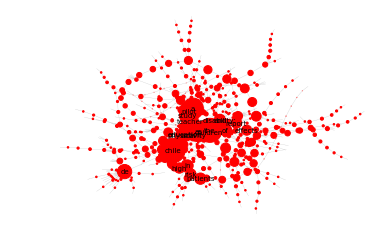

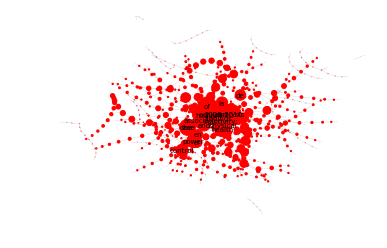

In [ ]:
for year in years:
    GoW_visualization(graphs[year],year)